In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("iris")

In [3]:
df.sample(7)

,sepal_length,sepal_width,petal_length,petal_width,species
21,5.1,3.7,1.5,0.4,setosa
71,6.1,2.8,4.0,1.3,versicolor
131,7.9,3.8,6.4,2.0,virginica
1,4.9,3.0,1.4,0.2,setosa
148,6.2,3.4,5.4,2.3,virginica
97,6.2,2.9,4.3,1.3,versicolor
52,6.9,3.1,4.9,1.5,versicolor


In [4]:
df.shape

(150, 5)

<Axes: xlabel='sepal_length', ylabel='Count'>

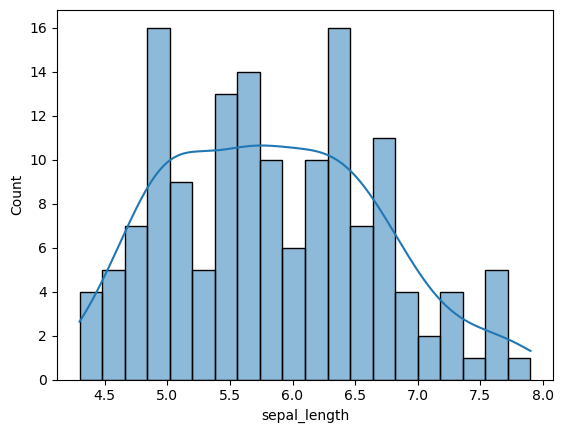

In [5]:
sns.histplot(df['sepal_length'], kde = True, bins=20)

<Axes: ylabel='sepal_width'>

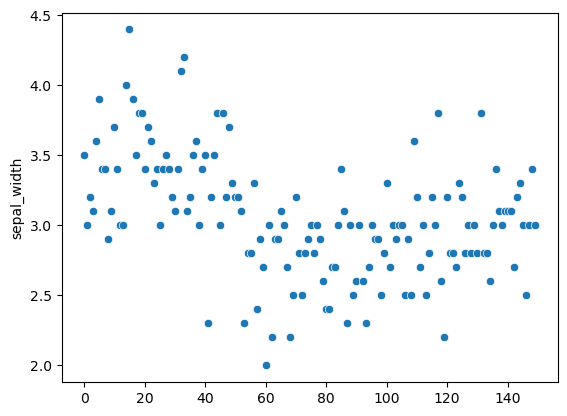

In [6]:
sns.scatterplot(df['sepal_width'], legend=True)

In [7]:
print(df['sepal_width'].max())
print(df['sepal_width'].min())
df['sepal_width'].std()

4.4
2.0


0.435866284936698

# capping the max and min values:

In [8]:
min_limit = df['sepal_width'].min()+0.4
max_limit = df['sepal_width'].max()-0.2

In [9]:
print(min_limit
,max_limit)

2.4 4.2


In [11]:
df[df['sepal_width'] > 4]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [12]:
df[df['sepal_width'] < 2.4]

,sepal_length,sepal_width,petal_length,petal_width,species
41,4.5,2.3,1.3,0.3,setosa
53,5.5,2.3,4.0,1.3,versicolor
60,5.0,2.0,3.5,1.0,versicolor
62,6.0,2.2,4.0,1.0,versicolor
68,6.2,2.2,4.5,1.5,versicolor
87,6.3,2.3,4.4,1.3,versicolor
93,5.0,2.3,3.3,1.0,versicolor
119,6.0,2.2,5.0,1.5,virginica


In [26]:
df['sepal_width'] = np.where(
    df['sepal_width'] > max_limit,  # Condition 1
    max_limit,                      # Value if Condition 1 is True
    np.where(
        df['sepal_width'] < min_limit,  # Condition 2
        min_limit,                      # Value if Condition 2 is True
        df['sepal_width']               # Value if both conditions are False
    )
)

In [27]:
df['sepal_width'].max()

4.2

In [28]:
df['sepal_width'].min()

2.4

# trimming the max and min values:

In [31]:
min_limit = df['sepal_width'].min()+0.4
max_limit = df['sepal_width'].max()-0.2

In [32]:
# methode1:(fastest methode for large datasets)
# df_filtered = df[df['sepal_width'].between(min_limit, max_limit) 

# methode2:(ease to use and simple)
df_filtered = df.query('@min_limit <= sepal_width <= @max_limit')

# methode3:(more flexible and reliable)
# df_filtered = df.loc[(df['sepal_width'] >= min_limit) & (df['sepal_width'] <= max_limit)]

In [38]:
print(f" max_width: {df['sepal_width'].max()},\n min_width:: {df['sepal_width'].min()}")

 max_width: 4.2,
 min_width:: 2.4
